<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#RFE" data-toc-modified-id="RFE-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>RFE</a></span></li><li><span><a href="#grid-search" data-toc-modified-id="grid-search-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>grid search</a></span></li></ul></li><li><span><a href="#feature-importance" data-toc-modified-id="feature-importance-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>feature importance</a></span></li><li><span><a href="#confusion-matrix" data-toc-modified-id="confusion-matrix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>confusion matrix</a></span></li><li><span><a href="#ROC-curve" data-toc-modified-id="ROC-curve-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ROC curve</a></span></li><li><span><a href="#Probability-dist" data-toc-modified-id="Probability-dist-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Probability dist</a></span></li><li><span><a href="#Interpretability" data-toc-modified-id="Interpretability-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Interpretability</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>PCA</a></span></li></ul></li></ul></div>

In [40]:
import matplotlib.pyplot as plt
plt.style.use('gadfly')
import seaborn as sns
import pandas as pd
import numpy as np
import shap

from tqdm import tqdm_notebook as tqdm

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

In [2]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.shape

(569, 31)

# EDA

In [4]:
def cols_eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_%'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    return pd.DataFrame(eda_df)

In [5]:
cols_eda(df)

,count,dtypes,max,mean,median,min,null_%,null_sum
mean radius,569,float64,28.11000,14.127292,13.370000,6.981000,0.0,0
mean texture,569,float64,39.28000,19.289649,18.840000,9.710000,0.0,0
mean perimeter,569,float64,188.50000,91.969033,86.240000,43.790000,0.0,0
mean area,569,float64,2501.00000,654.889104,551.100000,143.500000,0.0,0
mean smoothness,569,float64,0.16340,0.096360,0.095870,0.052630,0.0,0
mean compactness,569,float64,0.34540,0.104341,0.092630,0.019380,0.0,0
mean concavity,569,float64,0.42680,0.088799,0.061540,0.000000,0.0,0
mean concave points,569,float64,0.20120,0.048919,0.033500,0.000000,0.0,0
mean symmetry,569,float64,0.30400,0.181162,0.179200,0.106000,0.0,0
mean fractal dimension,569,float64,0.09744,0.062798,0.061540,0.049960,0.0,0


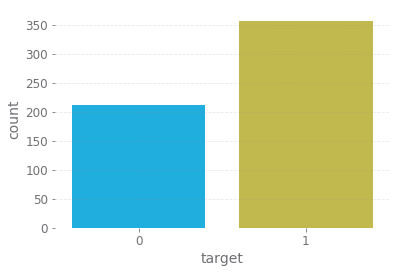

In [6]:
sns.countplot('target', data=df)

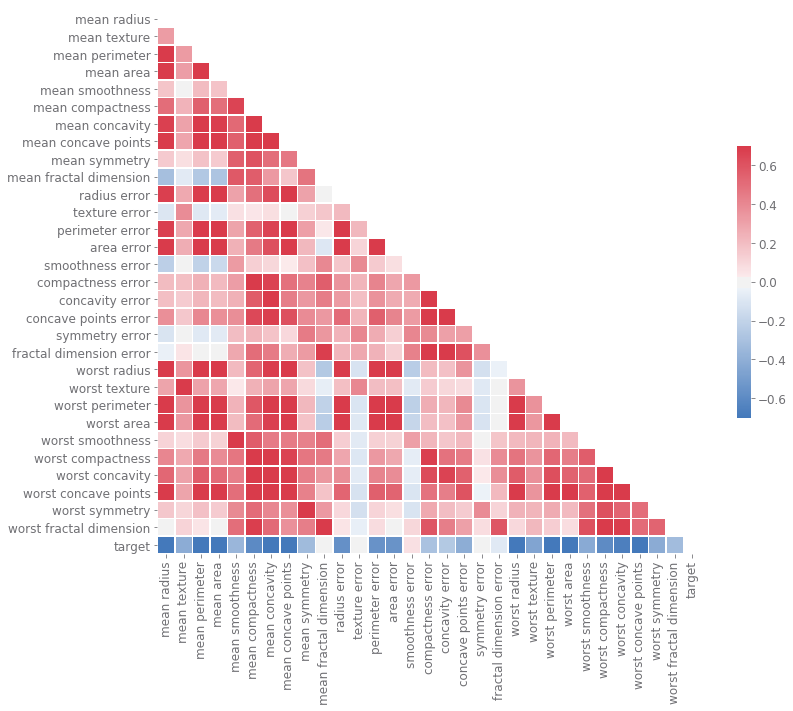

In [7]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # mask to have just a triangular matrix
f, ax = plt.subplots(figsize=(13, 10))
cmap = sns.diverging_palette(250, 9, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-0.7, vmax=0.7, center=0,
            square=True, annot=False, linewidths=.5, cbar_kws={"shrink": .5});

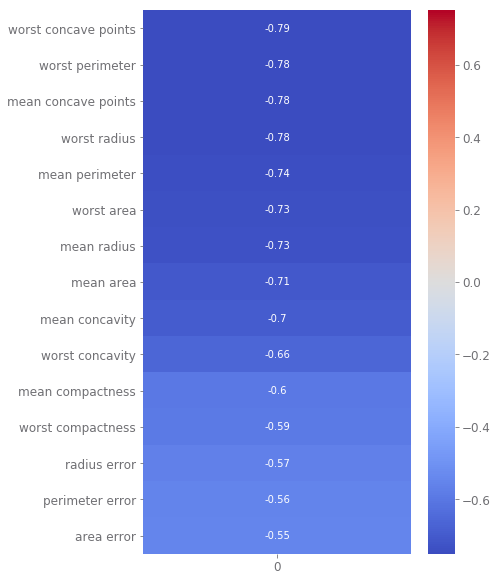

In [8]:
correlations = df.corrwith(df['target']).iloc[:-1].to_frame() # you should have features only and label as last column in df
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(6,10))
sns.heatmap(sorted_correlations[:15].to_frame(), cmap='coolwarm', annot=True, vmin=-0.75, vmax=0.75, ax=ax);

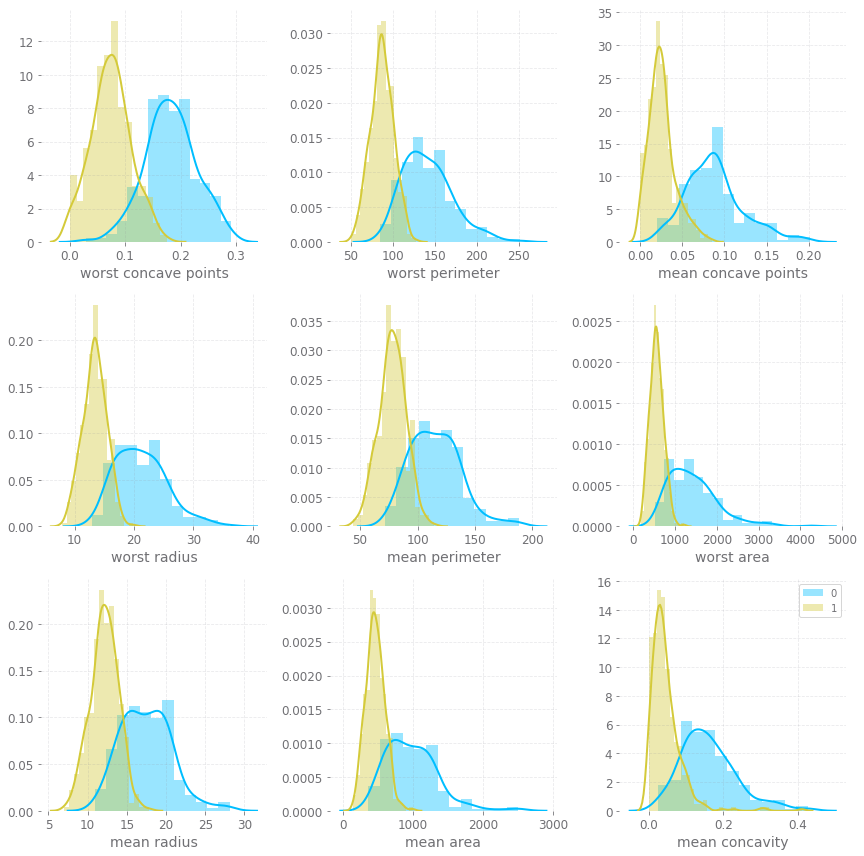

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12)) # this is for 9 plots
for i, col in enumerate(sorted_correlations.index[:9]):
    sns.distplot(df[df['target']==0][col], label='0', ax=axes[i//3][i%3])
    sns.distplot(df[df['target']==1][col], label='1', ax=axes[i//3][i%3])
plt.legend()
plt.tight_layout()

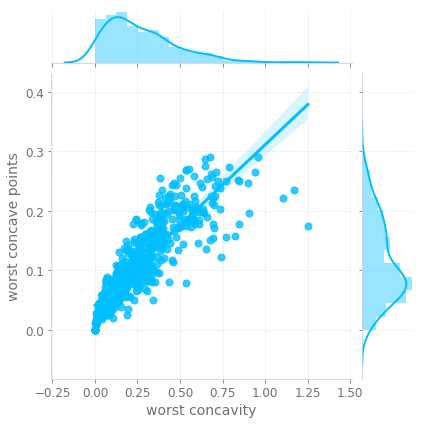

In [10]:
sns.jointplot(df.loc[:,'worst concavity'], df.loc[:,'worst concave points'], kind="reg");

# Model

In [29]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
forest = RandomForestClassifier(oob_score=True, random_state=42)
forest.fit(X_train, y_train)

print(f'training accuracy: {forest.score(X_train, y_train)}')
print(f'oob score: {forest.oob_score_}')
print(f'10-fold cross validation score: {np.mean(cross_val_score(forest, X_train, y_train, cv=10))}')

print(f'test accuracy: {forest.score(X_test, y_test)}')
y_pred = forest.predict(X_test)
pred_probs = forest.predict_proba(X_test)[:, 1]

training accuracy: 1.0
oob score: 0.9560439560439561
10-fold cross validation score: 0.9626086956521739
test accuracy: 0.9649122807017544


### RFE

In [31]:
forest_rfe = RandomForestClassifier(oob_score=True, random_state=42)

rfe = RFE(forest_rfe, n_features_to_select=8, step=2, verbose=1)
pipeline = Pipeline([('feature selection', rfe), ('classification', forest_rfe)])
pipeline.fit(X_train, y_train)

core_features = [i[1] for i in zip(pipeline['feature selection'].support_, X_train.columns) if i[0]]

print(f'test accuracy: {pipeline["classification"].score(X_test[core_features], y_test)}')

Fitting estimator with 30 features.
Fitting estimator with 28 features.
Fitting estimator with 26 features.
Fitting estimator with 24 features.
Fitting estimator with 22 features.
Fitting estimator with 20 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 12 features.
Fitting estimator with 10 features.
test accuracy: 0.956140350877193


### grid search

In [32]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9]
             }

forest_gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10)
forest_gs.fit(X_train, y_train)

print(f'training accuracy: {forest_gs.score(X_train, y_train)}')
print(f'10-fold cross validation score: {np.mean(forest_gs.cv_results_["mean_test_score"])}')
print(f'test accuracy: {forest_gs.score(X_test, y_test)}')
y_pred = forest_gs.predict(X_test)
pred_probs = forest_gs.predict_proba(X_test)[:, 1]

training accuracy: 1.0
10-fold cross validation score: 0.9495712560386473
test accuracy: 0.9649122807017544


## feature importance

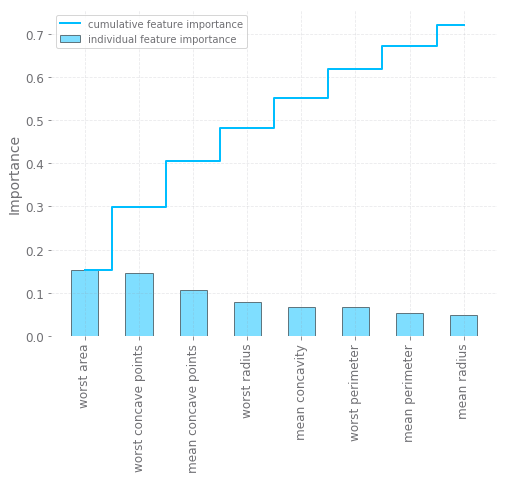

In [33]:
def plot_feature_importance(df, forest, n):
    features = df.columns
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    fig = plt.figure(figsize=(8,6))
    plt.bar(np.arange(0,n,1), importances[indices[:n]], align='center', width=.5, alpha=.5, linewidth=1.0, edgecolor='k',
           label='individual feature importance')
    plt.step(np.arange(0,n,1), np.cumsum(importances[indices[:n]]), where='mid', label='cumulative feature importance')
    plt.xticks(np.arange(0,n,1), features[indices[:n]], rotation=90)
    plt.ylabel('Importance')
    plt.legend(loc='best')
    
plot_feature_importance(X_train, forest, 8)

## confusion matrix

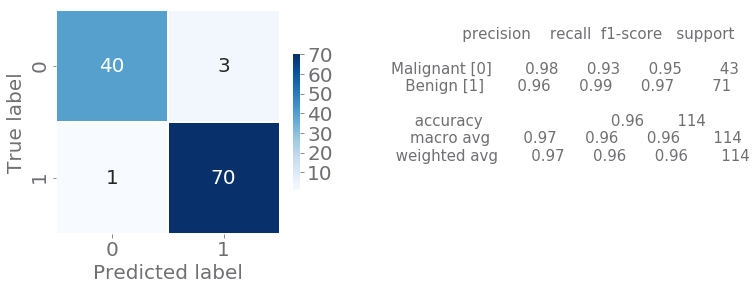

In [34]:
def plot_confmat(y_true, y_pred):
    confmat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    ax = sns.heatmap(confmat, annot=True, annot_kws={'size':20}, fmt=".0f", 
                linewidths=.5, square = True, cmap = 'Blues', cbar_kws={"shrink": .5})
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.tick_params(axis='both', labelsize=20)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    plt.text(3, 1.5, classification_report(y_true, y_pred, target_names=['Malignant [0]', 'Benign [1]']), size=15)
    
plot_confmat(y_test, y_pred)

## ROC curve

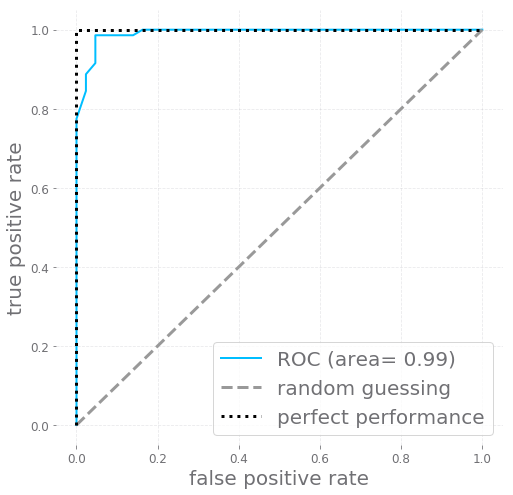

In [35]:
def plot_ROC_curve(y_true, pred_probs):
        fig = plt.figure(figsize=(8,8))
        fpr, tpr, thresholds = roc_curve(y_true, pred_probs, pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linewidth=2, label=f'ROC (area= %.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], linestyle='--', linewidth=3, color=(0.6, 0.6, 0.6), label='random guessing')
        plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', linewidth=3, color='k', label='perfect performance')
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('false positive rate', size=20)
        plt.ylabel('true positive rate', size=20)
        plt.legend(loc="lower right", fontsize=20)
        
plot_ROC_curve(y_test, pred_probs)

## Probability dist

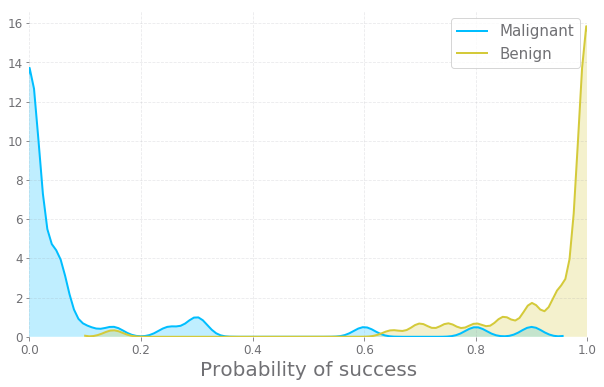

In [36]:
def plot_probs(probs0, probs1):
        fig = plt.figure(figsize=(10,6))
        sns.distplot(probs0, hist=False, kde_kws={"shade": True}, label='Malignant')
        sns.distplot(probs1, hist=False, kde_kws={"shade": True}, label='Benign')
        plt.xlabel('Probability of success', size=20)
        plt.legend(loc='best', fontsize=15)
        plt.xlim([0.0, 1])
        
df_probs = pd.DataFrame({'y_true':y_test.values, 'probs':pred_probs})
probs0 = df_probs[df_probs.y_true==0].probs
probs1 = df_probs[df_probs.y_true==1].probs
plot_probs(probs0, probs1)

## Interpretability

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


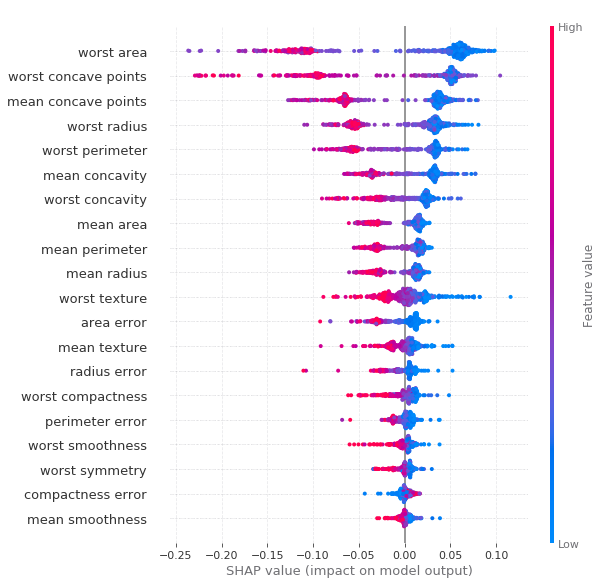

In [37]:
def summary_plot(trained_model, X_train):
    plt.figure(figsize=(6,6))
    explainer = shap.TreeExplainer(trained_model)
    shap_values = explainer.shap_values(X_train)
    shap.summary_plot(shap_values[1], X_train, show=True)
    
summary_plot(forest, X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


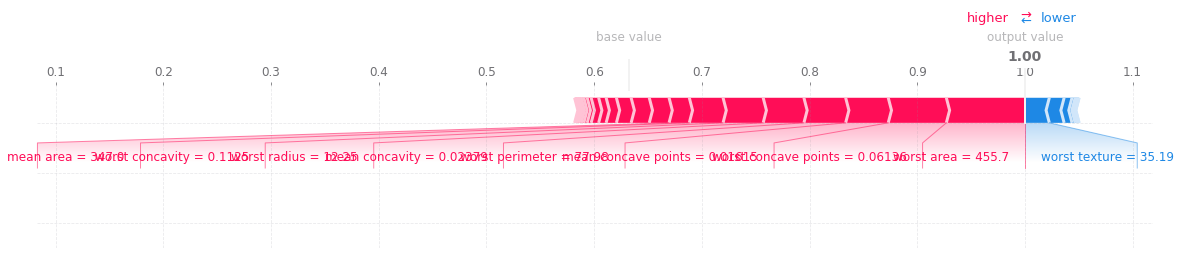

In [38]:
def shap_plot_(trained_model, X_train, index, label):
#     plt.clf()
    explainer = shap.TreeExplainer(trained_model)
    shap_values = explainer.shap_values(X_train)
    # load JS visualization code to notebook
    shap.initjs()
    shap.force_plot(explainer.expected_value[label], shap_values[label][index], X_train.iloc[index,:], matplotlib=True, show=False)
    
shap_plot_(forest, X_train, index=3, label=1)

## PCA

In [39]:
sc = StandardScaler()
pca = PCA(n_components=8)
X_train_std = sc.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_std)
X_test_std = sc.fit_transform(X_test)
X_test_pca = pca.fit_transform(X_test_std)

forest = RandomForestClassifier(oob_score=True, random_state=42)
forest.fit(X_train_pca, y_train)

print(f'training accuracy: {forest.score(X_train_pca, y_train)}')
print(f'oob score: {forest.oob_score_}')

print(f'test accuracy: {forest.score(X_test_pca, y_test)}')

training accuracy: 1.0
oob score: 0.9604395604395605
test accuracy: 0.9473684210526315
